In [1]:
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport as Prt
import numpy as np

In [2]:
data = pd.read_csv('Churn_modelling.csv')

In [3]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
data.drop(['CustomerId','RowNumber', 'Surname'],axis=1, inplace=True)

In [7]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# data analysis

In [9]:
profile = Prt(data, title="Report")
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

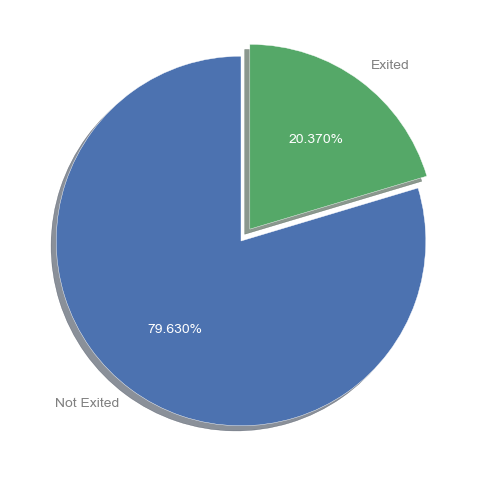

In [33]:
vals = data['Exited'].value_counts()
classes = ['Not Exited', 'Exited']
fig, ax = plt.subplots(figsize = (8, 6), dpi = 100)
explode = (0, 0.08)
patches, texts, autotexts = ax.pie(vals, labels =classes, autopct = '%1.3f%%', shadow = True,
                                   startangle = 90, explode = explode)
plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 10, color = 'white')
plt.show()

In [34]:
#using autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (10000, 14)
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw Bar Plots
Time to run AutoViz (in seconds) = 1.248


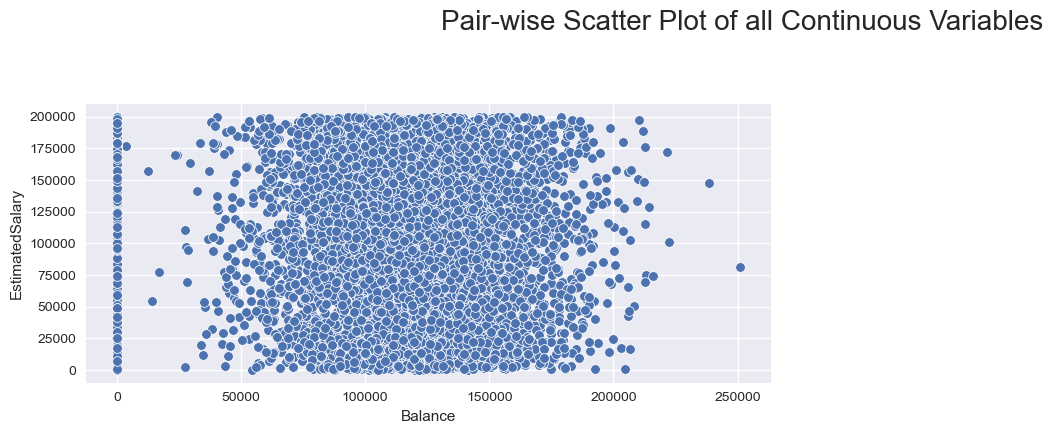

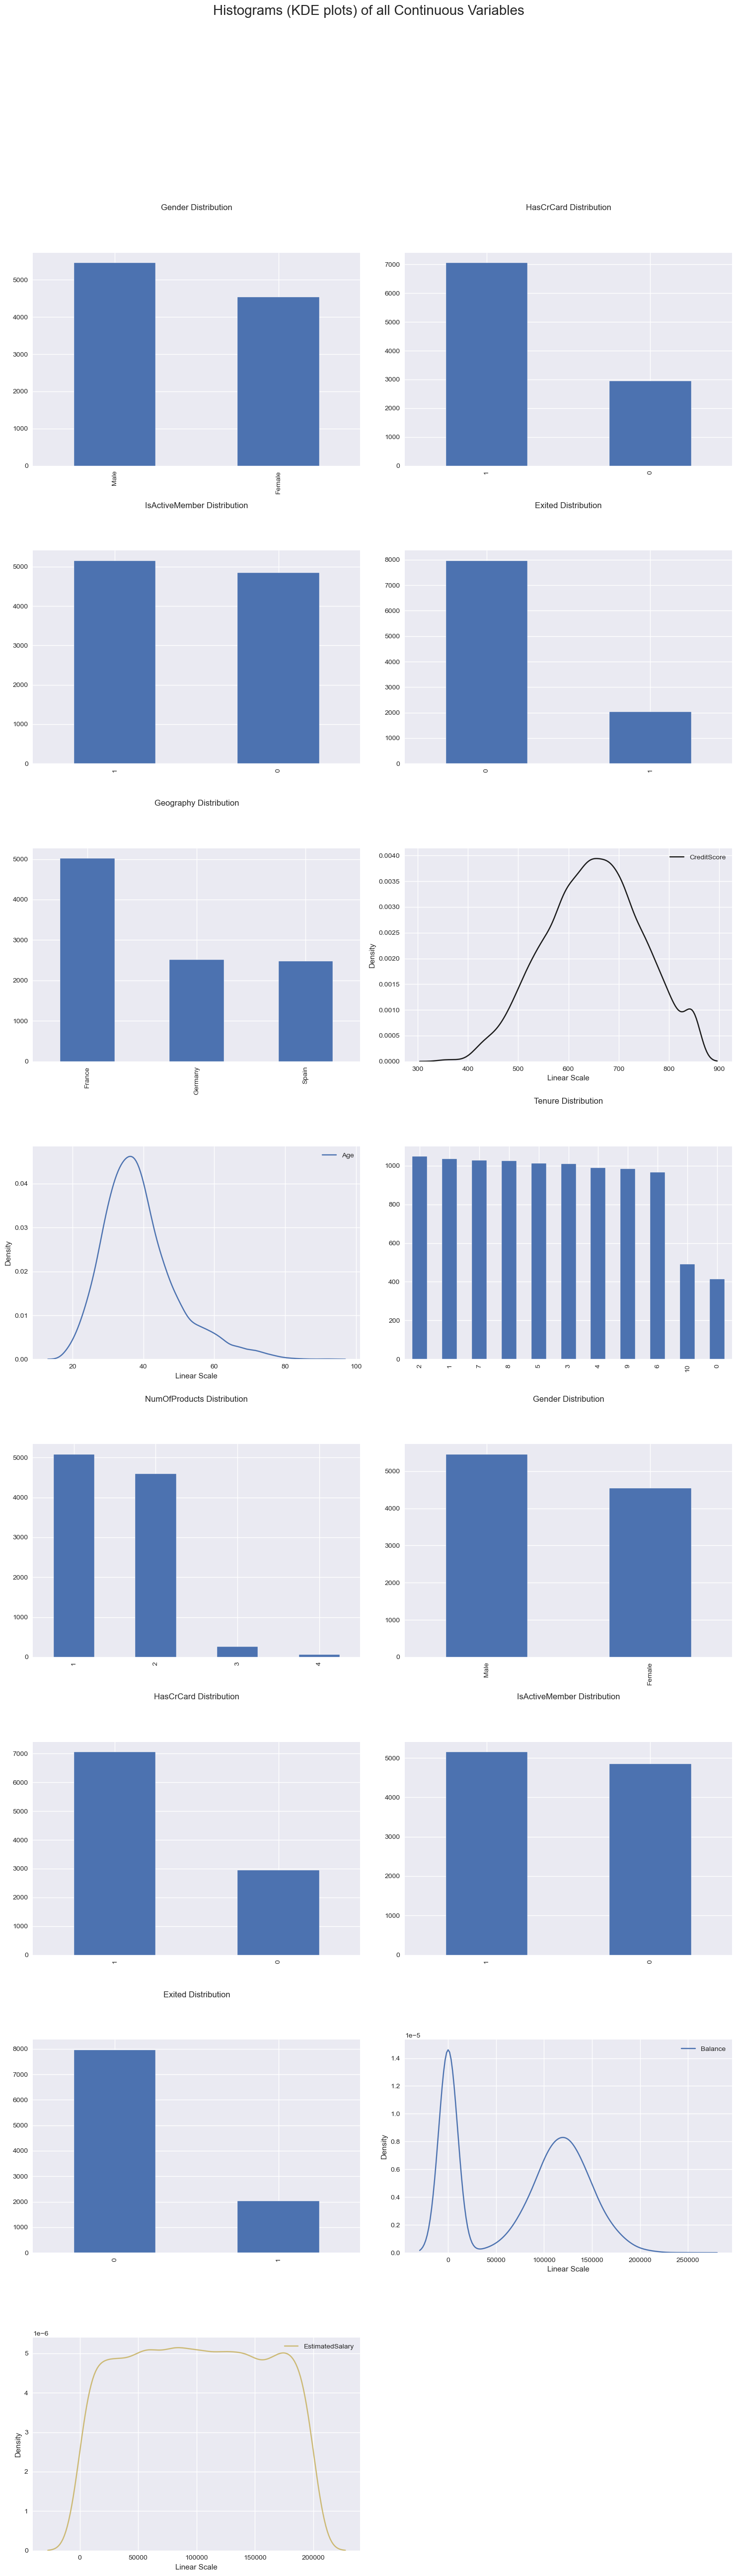

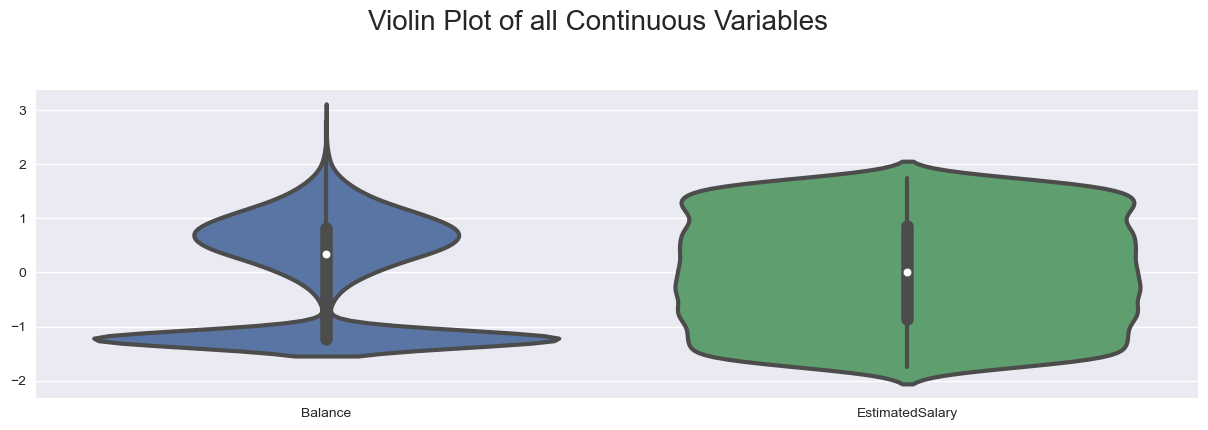

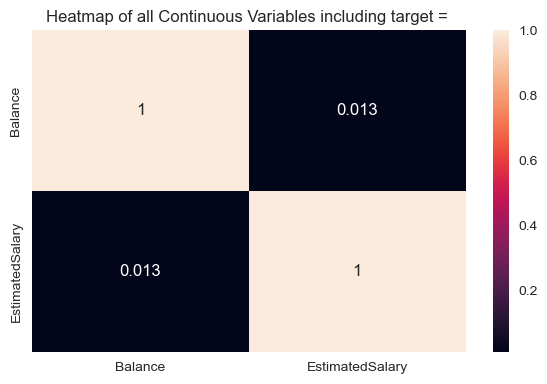

<Figure size 1500x10400 with 0 Axes>

In [35]:
df = AV.AutoViz('Churn_modelling.csv')

Shape of your Data Set: (10000, 14)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
Total Number of Scatter Plots = 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 4.337


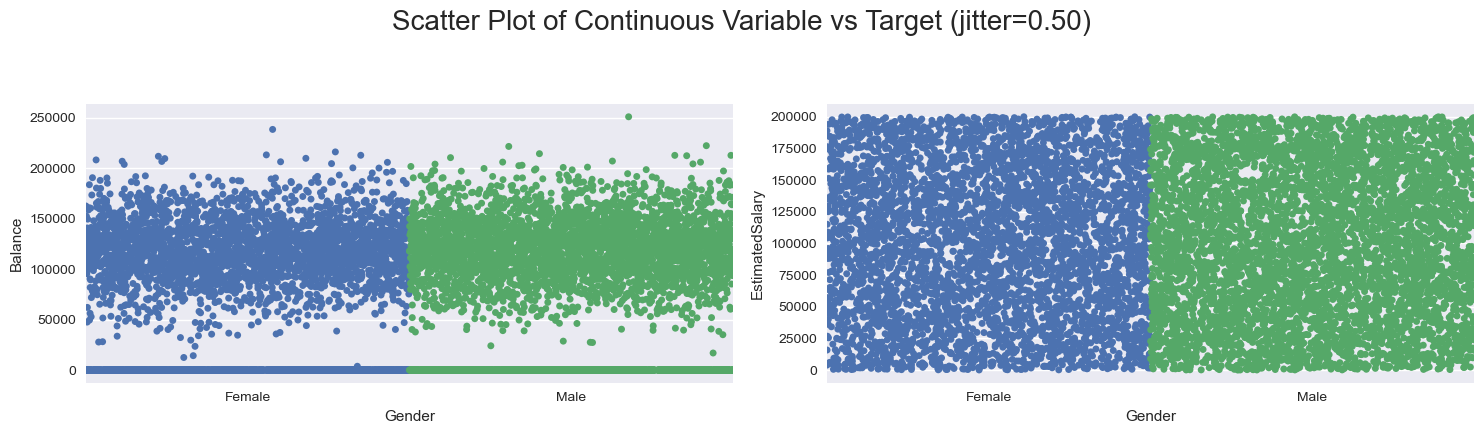

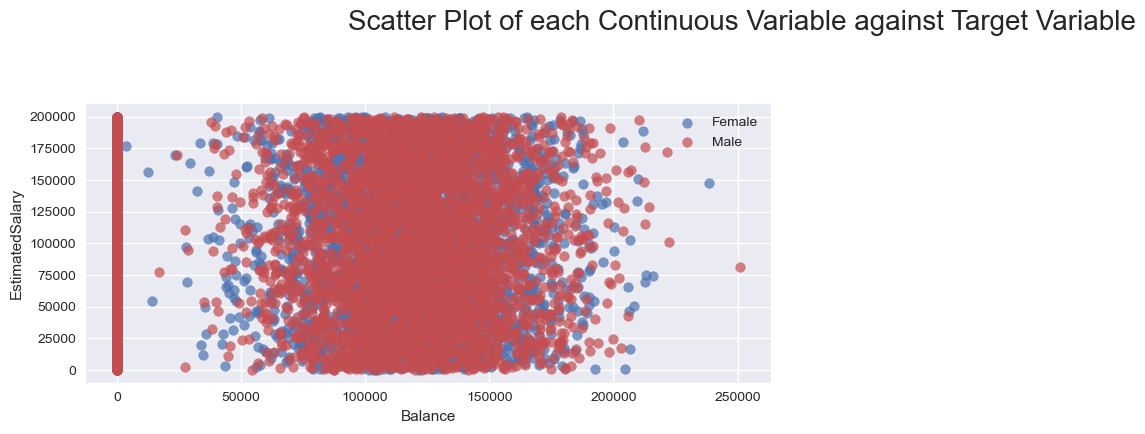

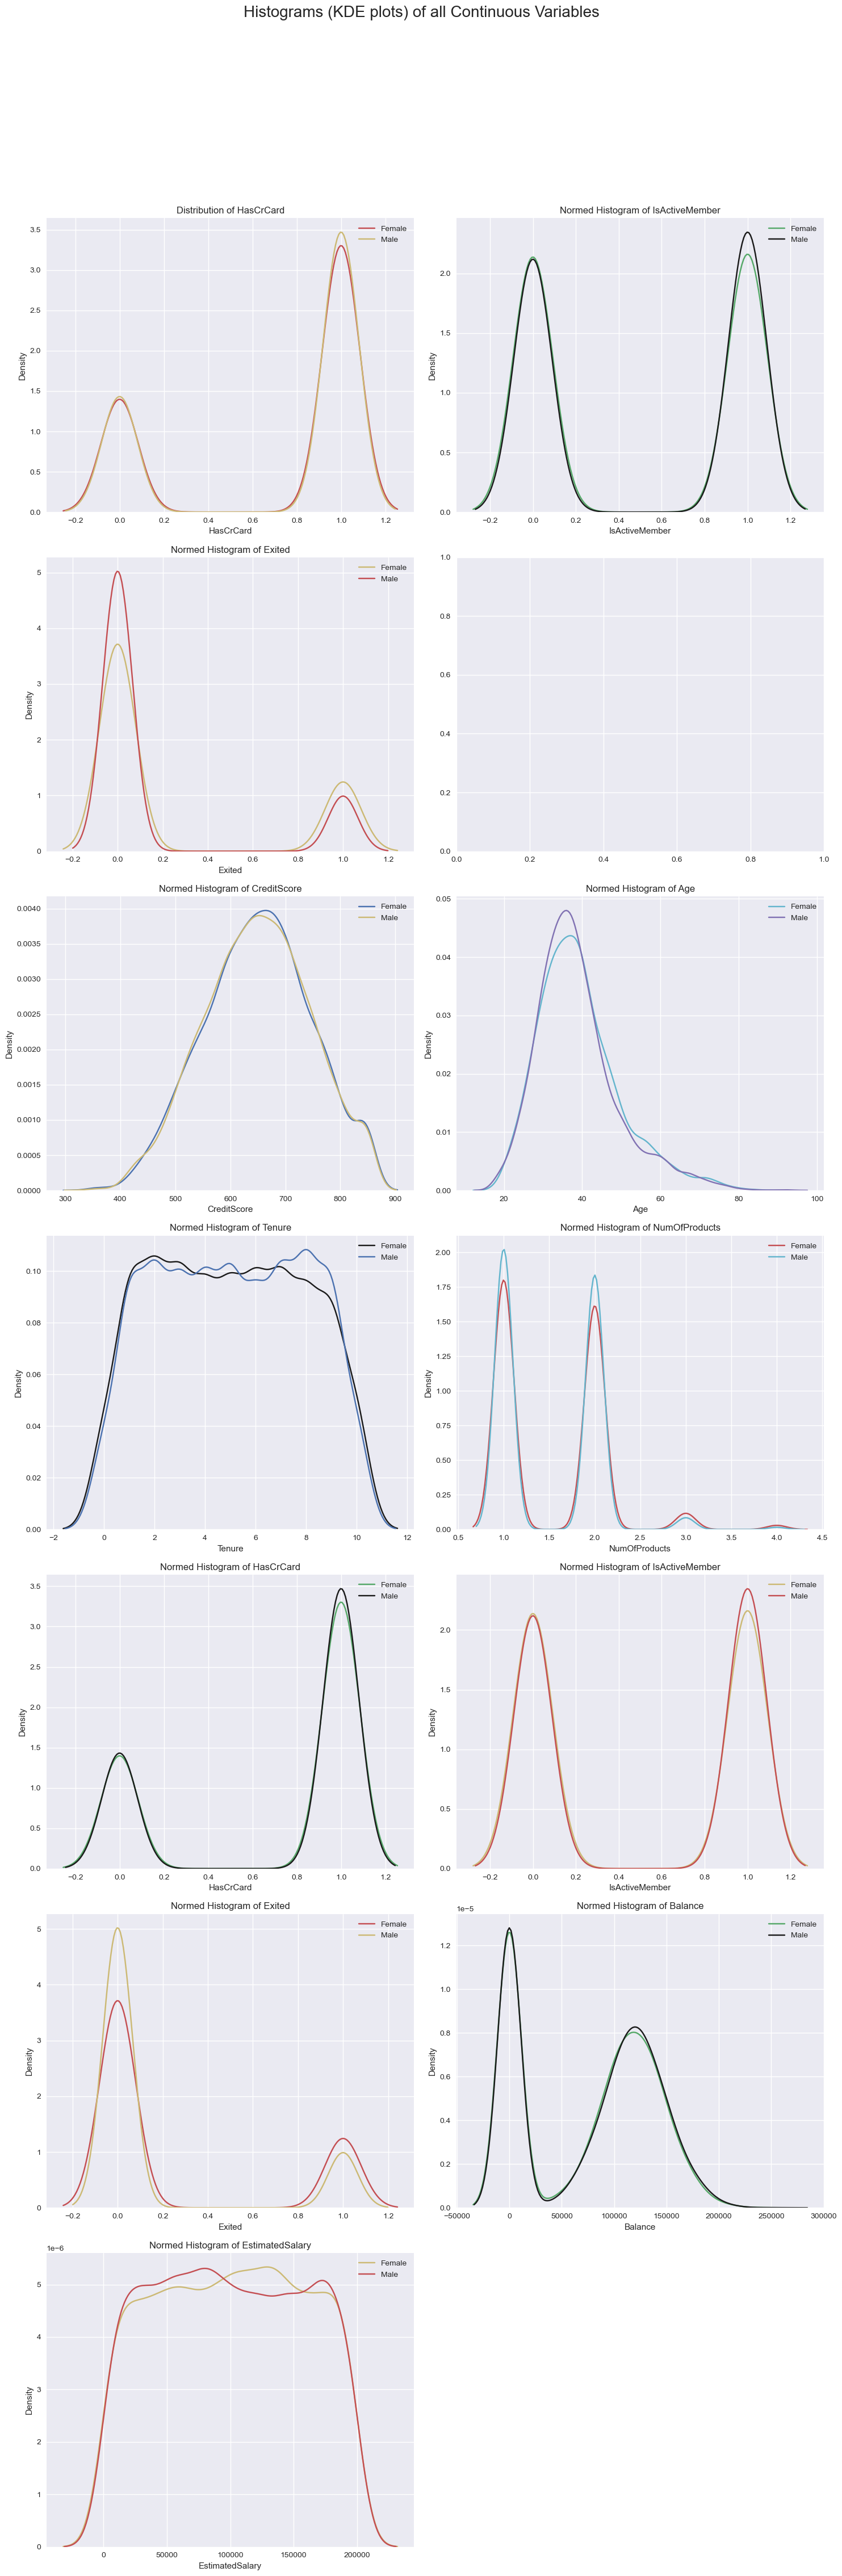

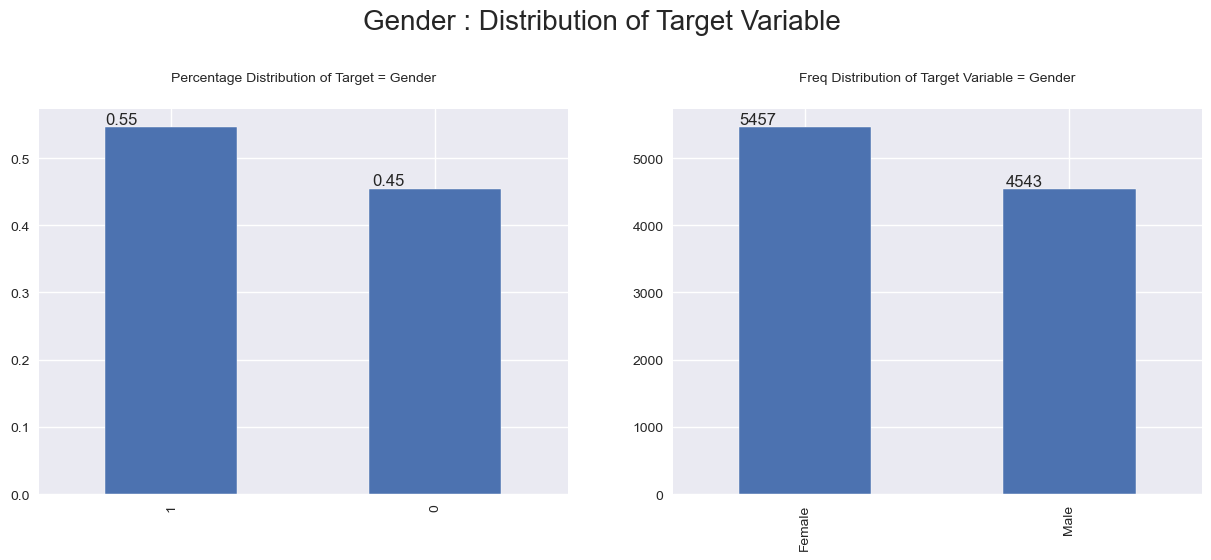

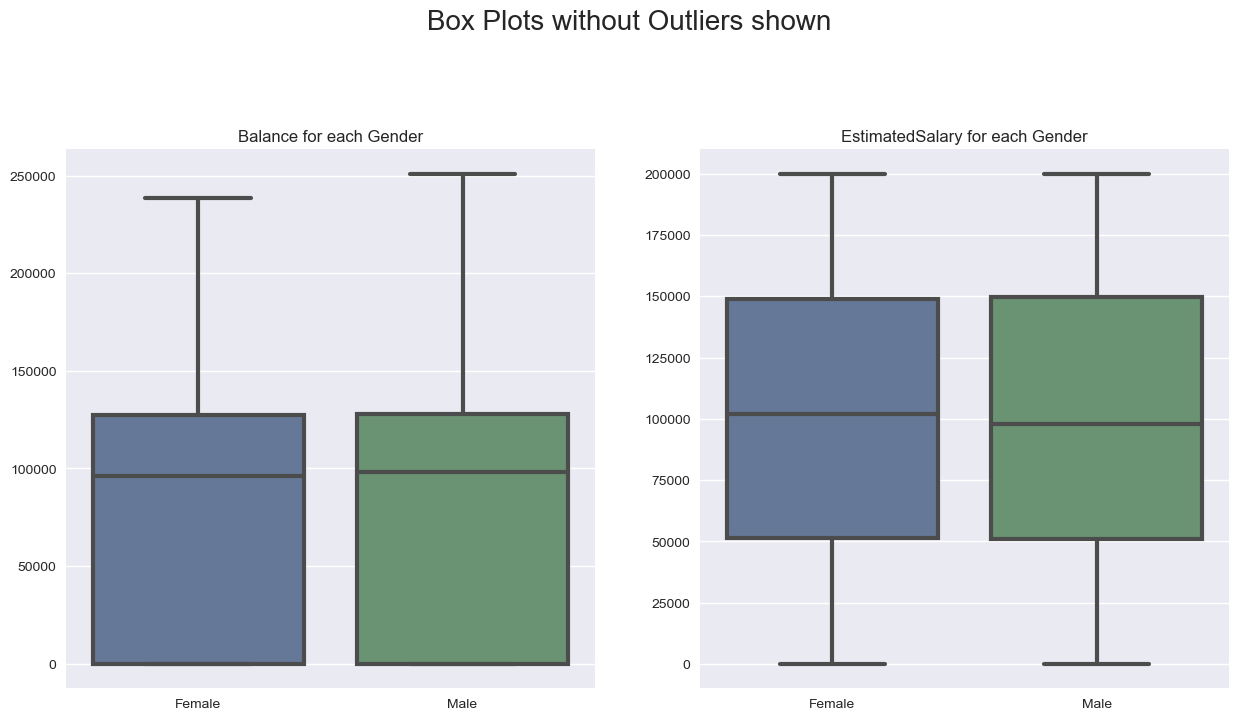

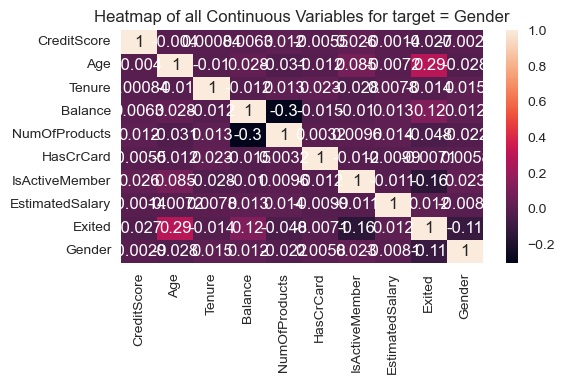

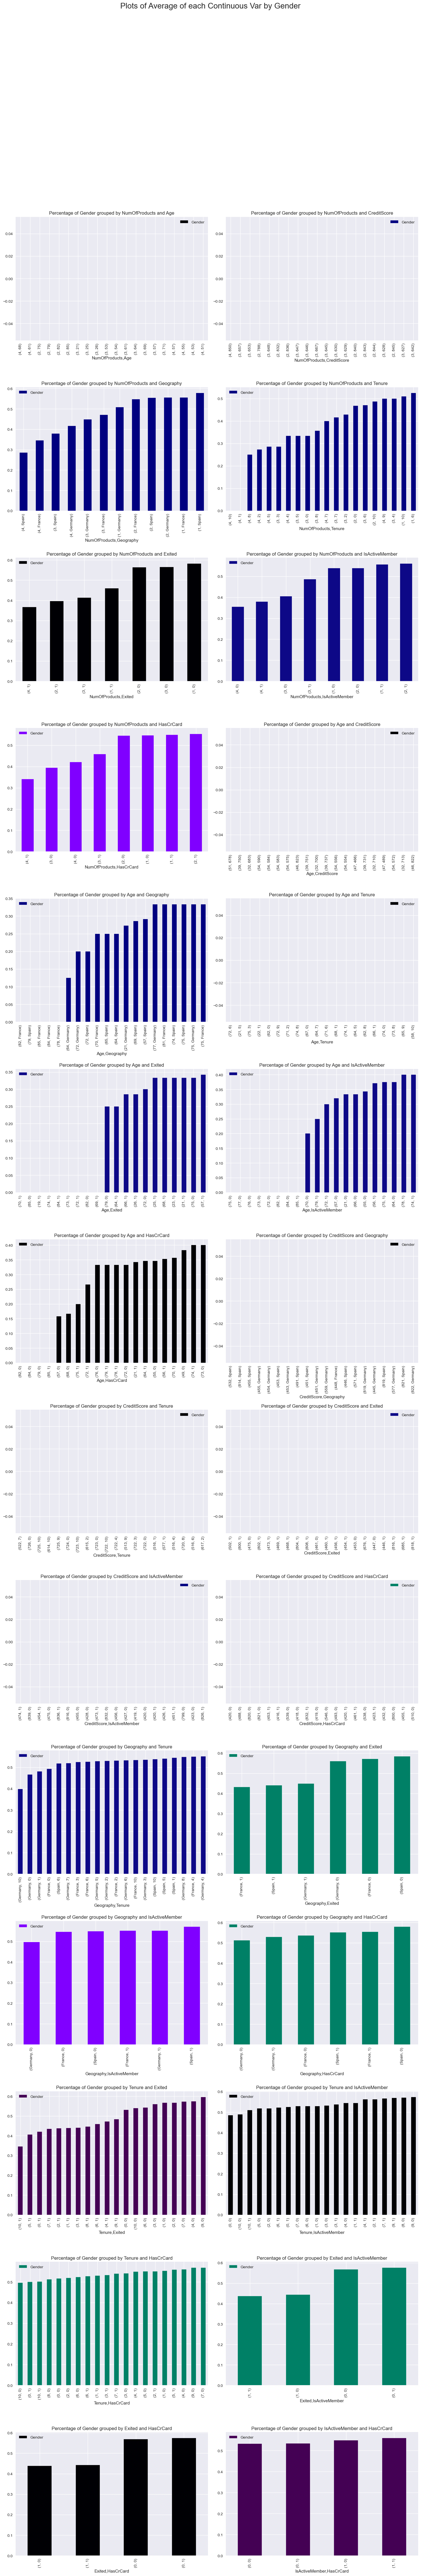

In [36]:
df = AV.AutoViz('Churn_modelling.csv', depVar='Gender')

Shape of your Data Set: (10000, 14)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
Total Number of Scatter Plots = 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 4.079


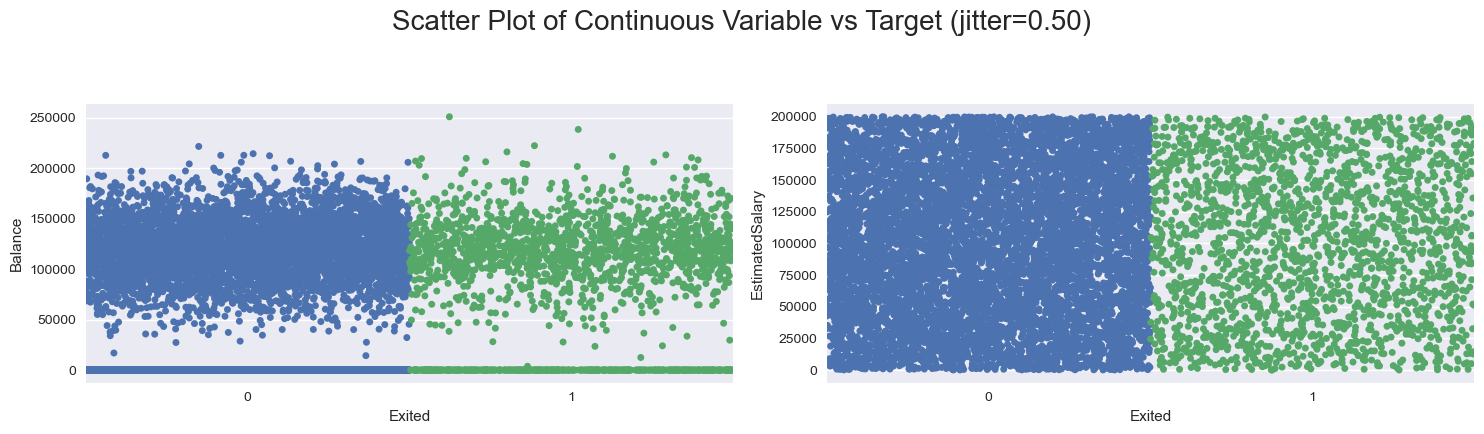

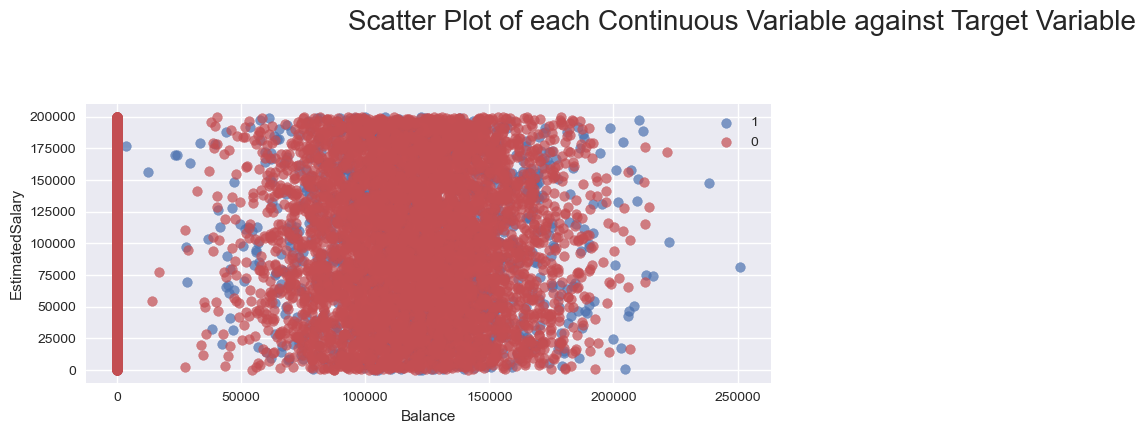

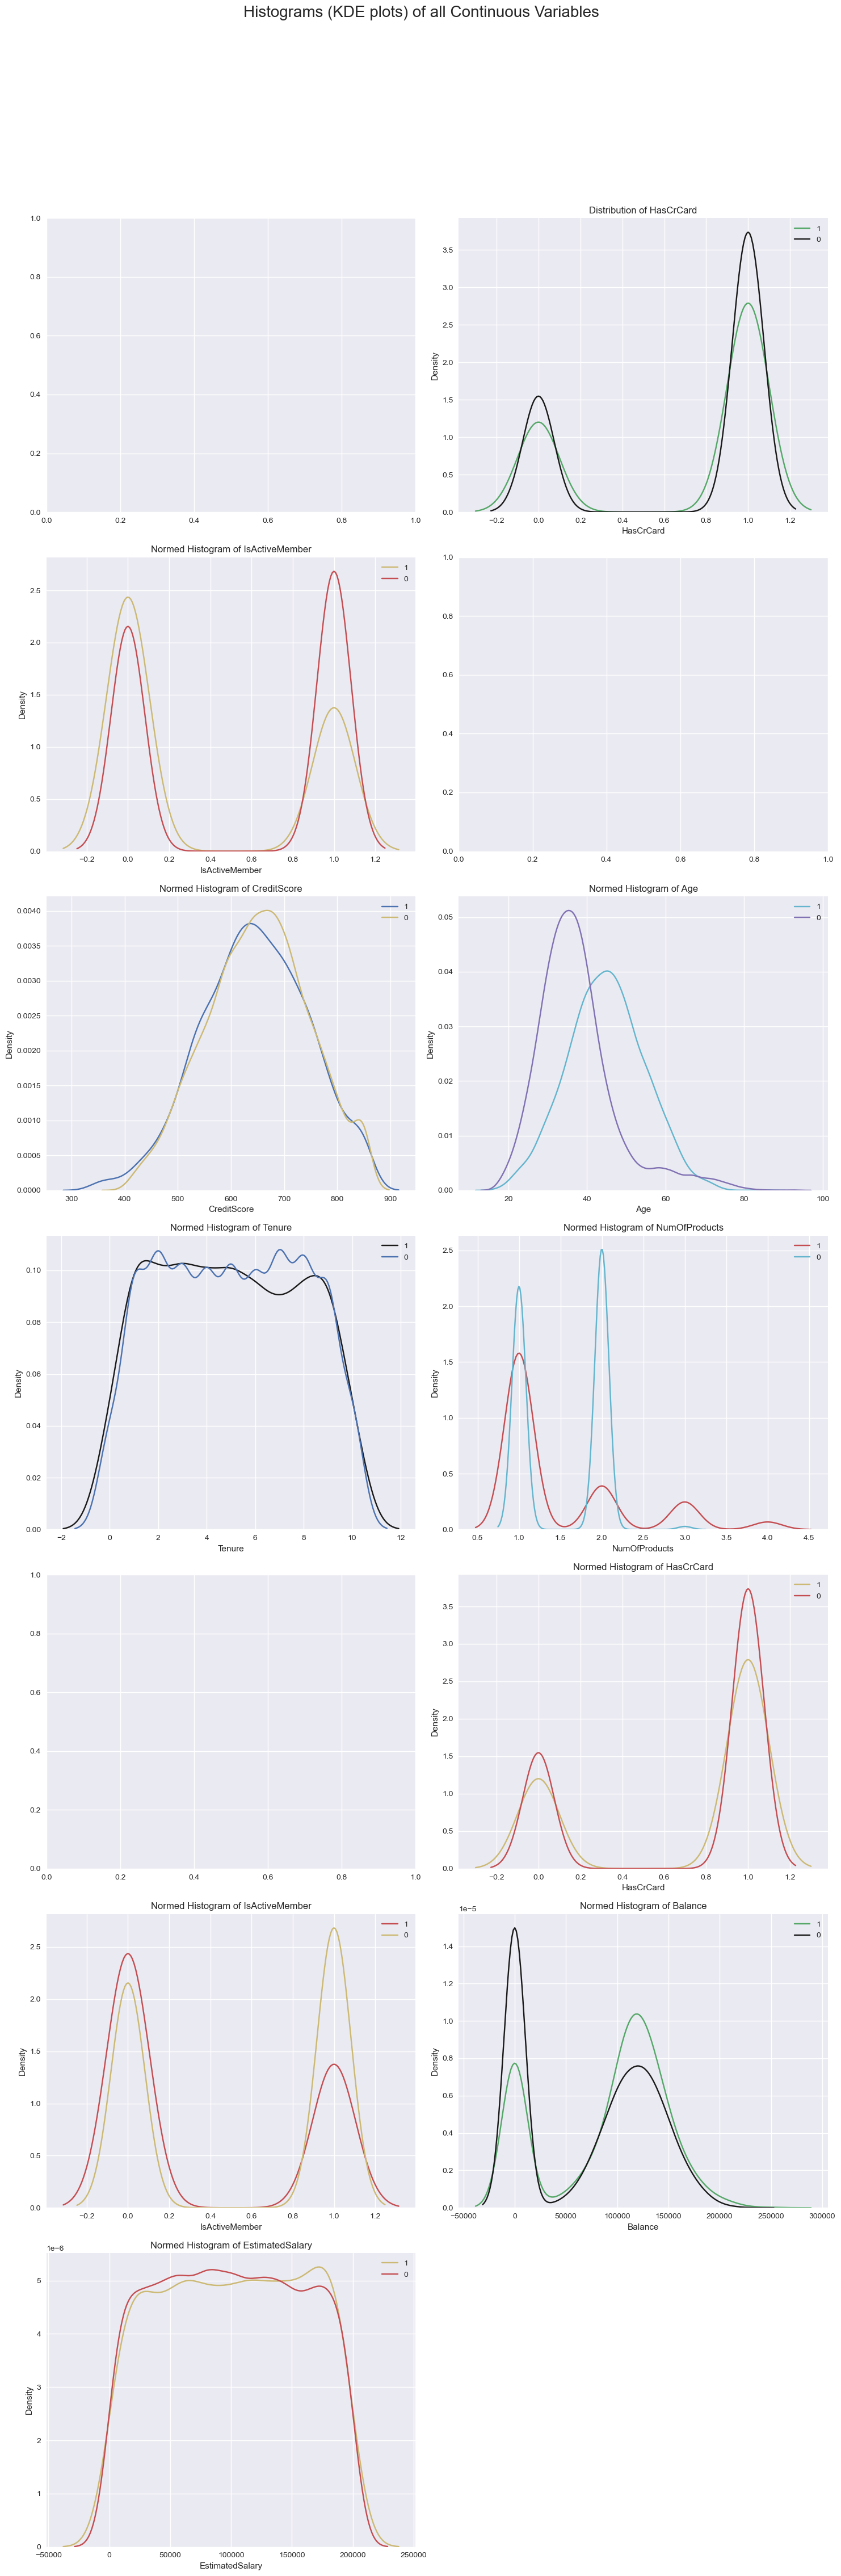

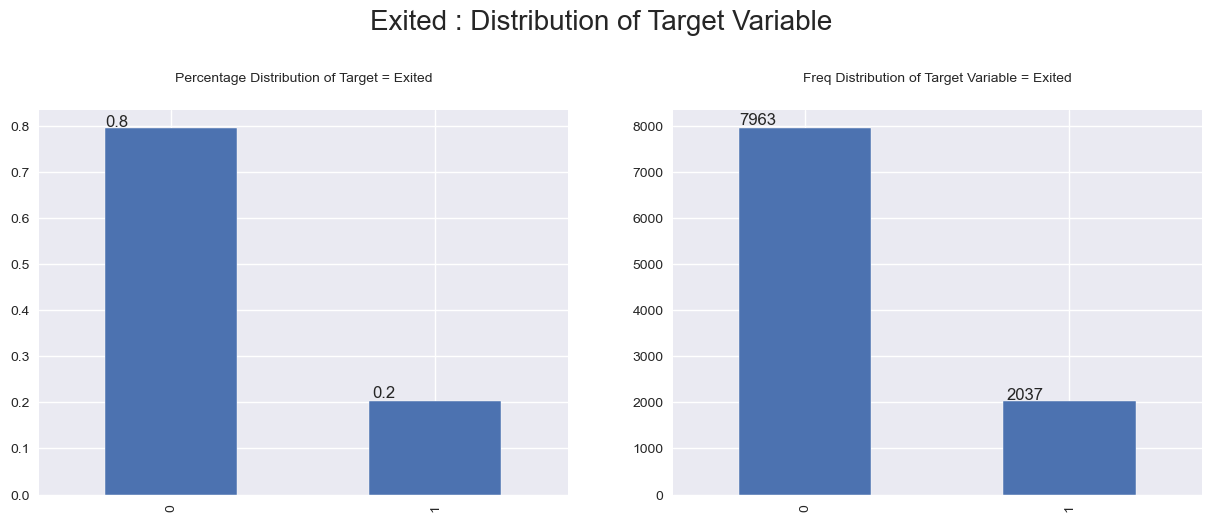

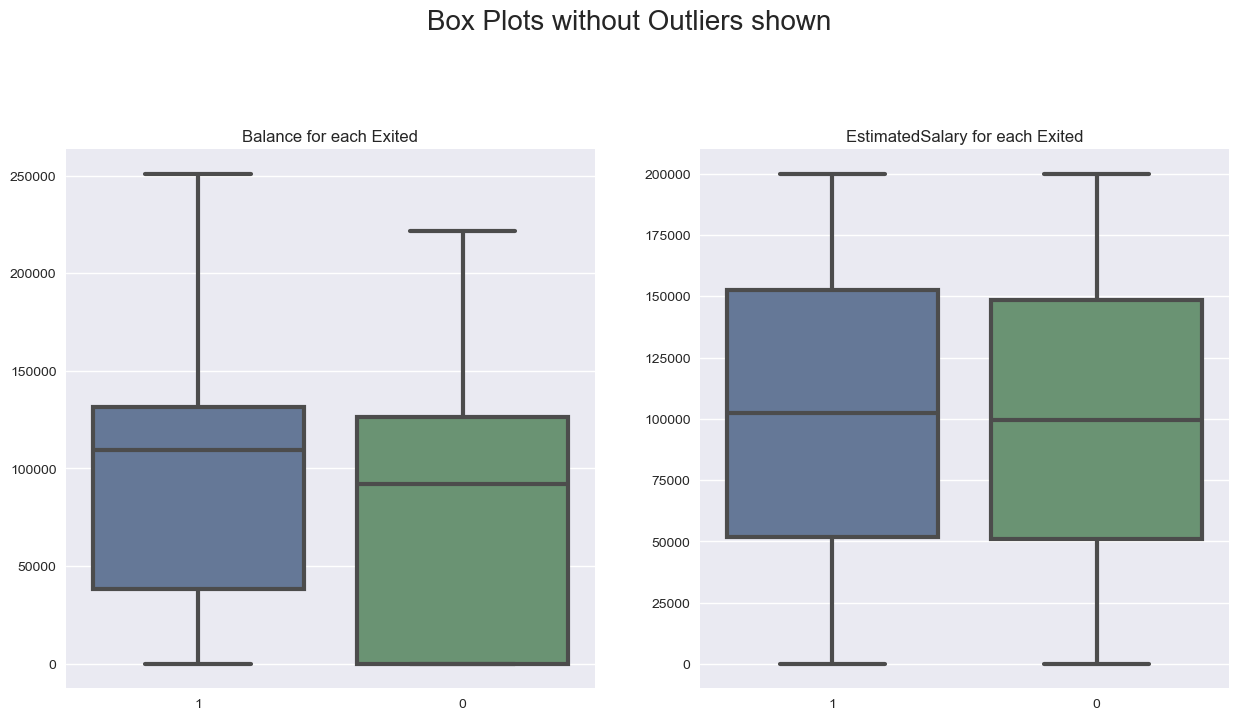

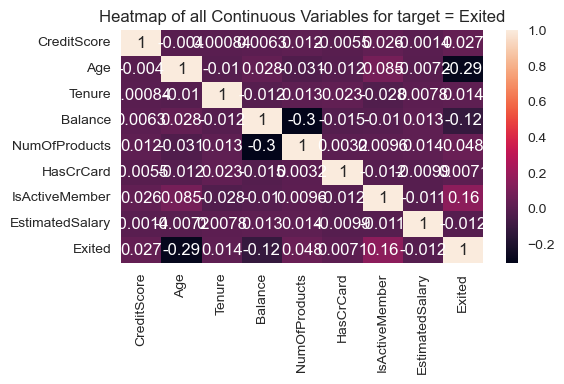

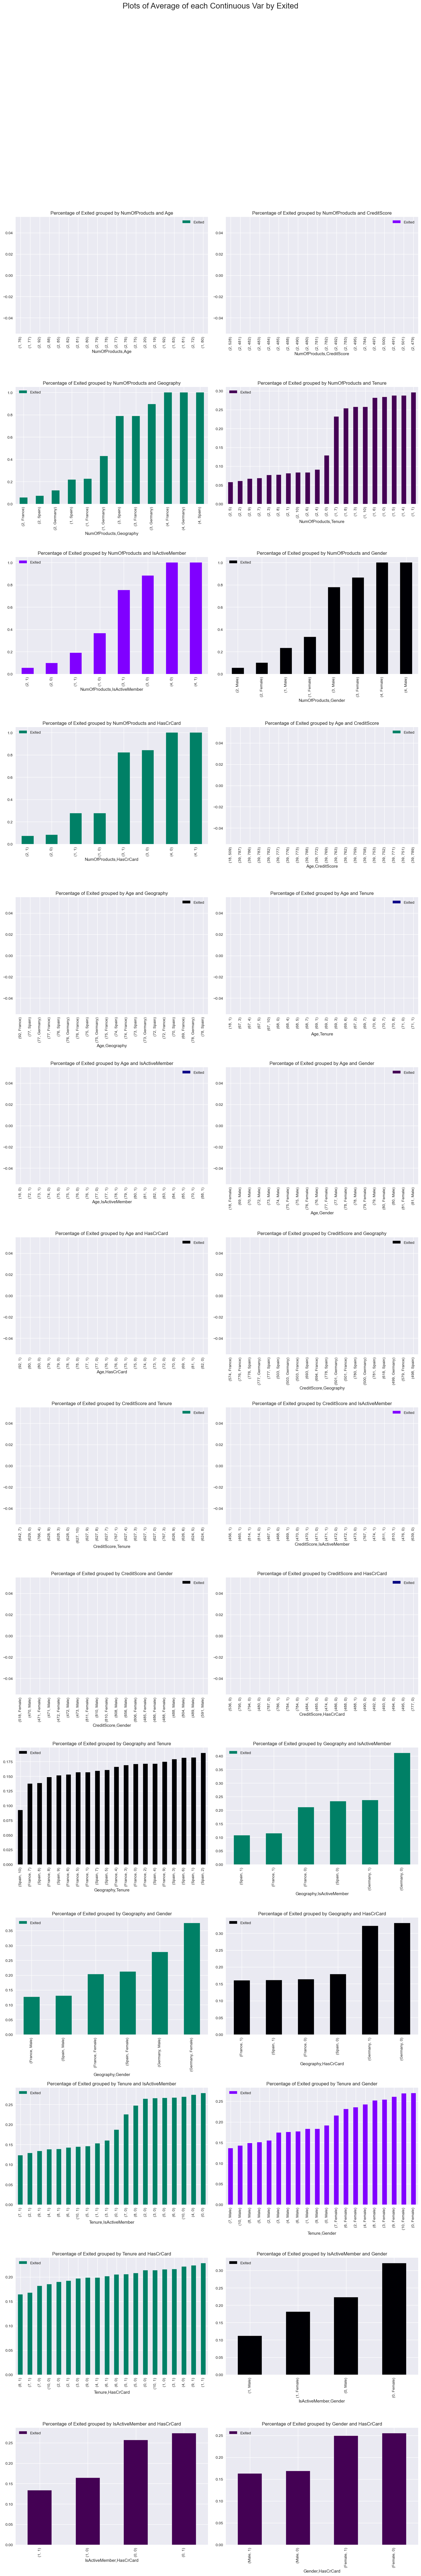

In [37]:
df = AV.AutoViz('Churn_modelling.csv', depVar='Exited')

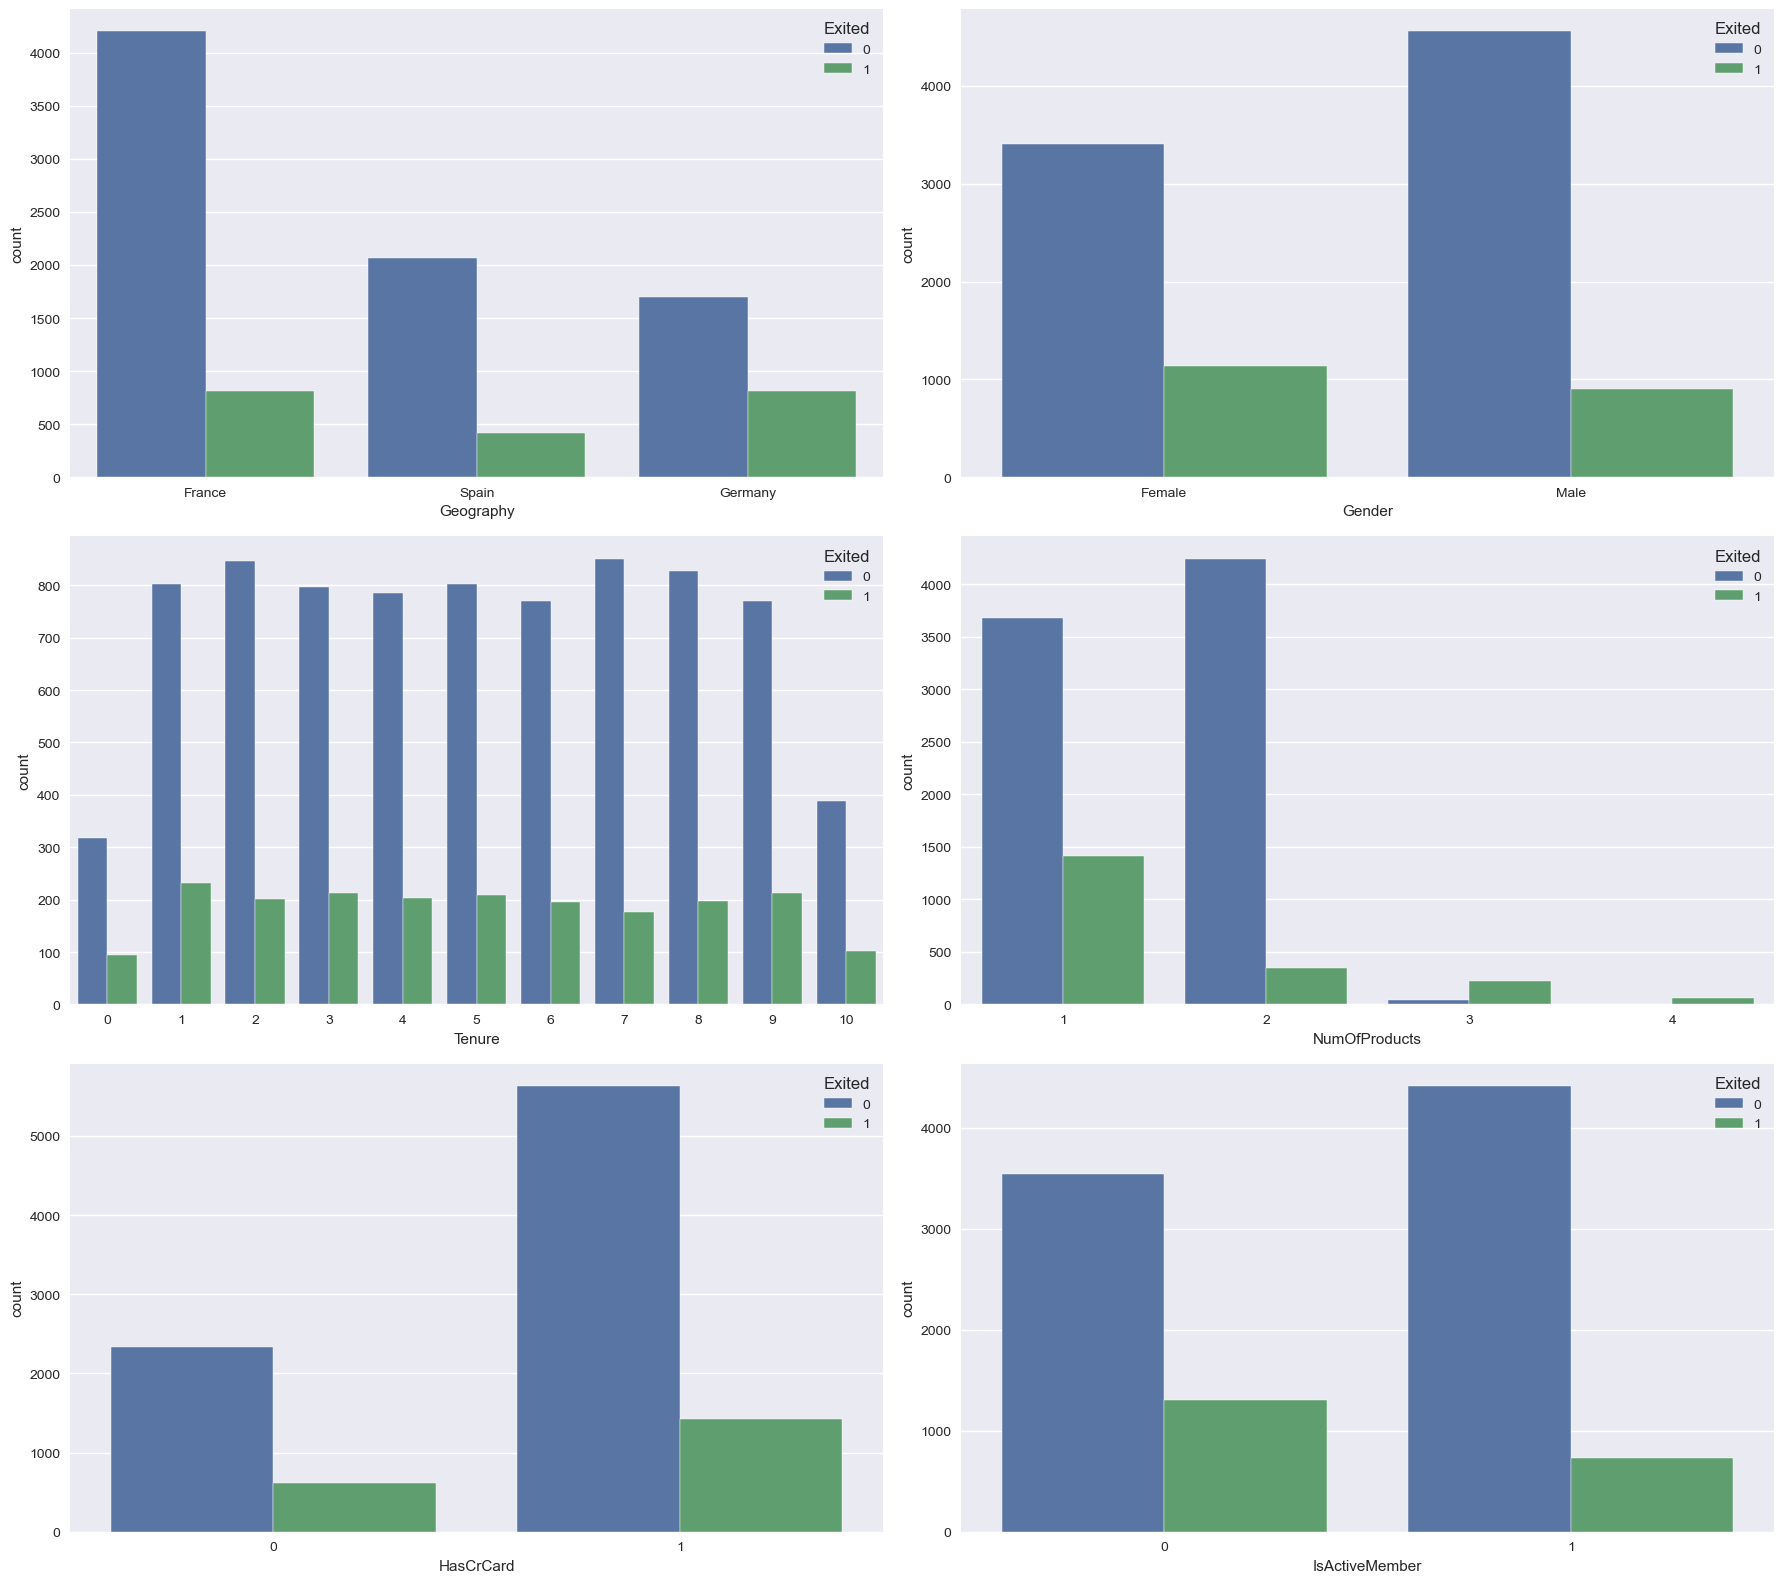

In [38]:
# displaying several features against the target column
fig, ax = plt.subplots(3, 2, figsize = (18, 16))

sns.countplot('Geography', hue = 'Exited', data = data, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = data, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = data, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = data, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = data, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = data, ax = ax[2][1])

plt.tight_layout(pad=1.08,rect=None)
plt.show()

In [39]:
# encoding 

In [40]:

data['Geography'] = data['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})

In [41]:
data

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       1   42       2       0.00              1   
1             608          2       1   41       1   83807.86              1   
2             502          0       1   42       8  159660.80              3   
3             699          0       1   39       1       0.00              2   
4             850          2       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       0   39       5       0.00              2   
9996          516          0       0   35      10   57369.61              1   
9997          709          0       1   36       7       0.00              1   
9998          772          1       0   42       3   75075.31              2   
9999          792          0       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [205]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [206]:
# working on labels (target) and features

In [207]:


X = data.drop('Exited', axis = 1)
y = to_categorical(data.Exited)

In [208]:
# train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [209]:
# Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [210]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization


In [211]:
#SLP

In [212]:
#parameters
size = (10,) # inpute shape
model = Sequential()
model.add(Dense(56, kernel_initializer = 'normal', activation = 'relu', input_shape = size))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 56)                616       
                                                                 
 dense_54 (Dense)            (None, 2)                 114       
                                                                 
Total params: 730
Trainable params: 730
Non-trainable params: 0
_________________________________________________________________


In [213]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [214]:
model_history = model.fit(X_train, y_train, validation_split = 0.25, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.5043 - accuracy: 0.7961 - val_loss: 0.4393 - val_accuracy: 0.8000
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8172 - val_loss: 0.4171 - val_accuracy: 0.8332
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8337 - val_loss: 0.4006 - val_accuracy: 0.8384
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8408 - val_loss: 0.3856 - val_accuracy: 0.8460
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.8468 - val_loss: 0.3720 - val_accuracy: 0.8496
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.8496 - val_loss: 0.3645 - val_accuracy: 0.8564
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3604 - accuracy: 0.8539 - val_loss: 0.3594 - val_accuracy: 0.8568

Epoch 58/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3268 - accuracy: 0.8657 - val_loss: 0.3377 - val_accuracy: 0.8600
Epoch 59/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8655 - val_loss: 0.3376 - val_accuracy: 0.8608
Epoch 60/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8636 - val_loss: 0.3380 - val_accuracy: 0.8604
Epoch 61/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8655 - val_loss: 0.3395 - val_accuracy: 0.8608
Epoch 62/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8673 - val_loss: 0.3370 - val_accuracy: 0.8624
Epoch 63/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3257 - accuracy: 0.8655 - val_loss: 0.3400 - val_accuracy: 0.8604
Epoch 64/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3255 - accuracy: 0.8648 - val_loss: 0.3382 - val_accuracy:

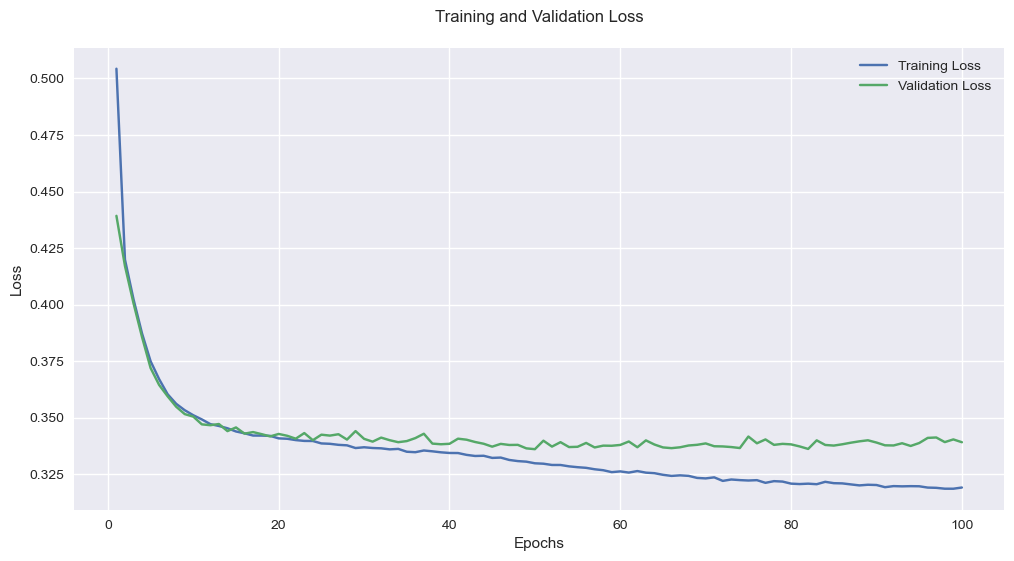

In [215]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

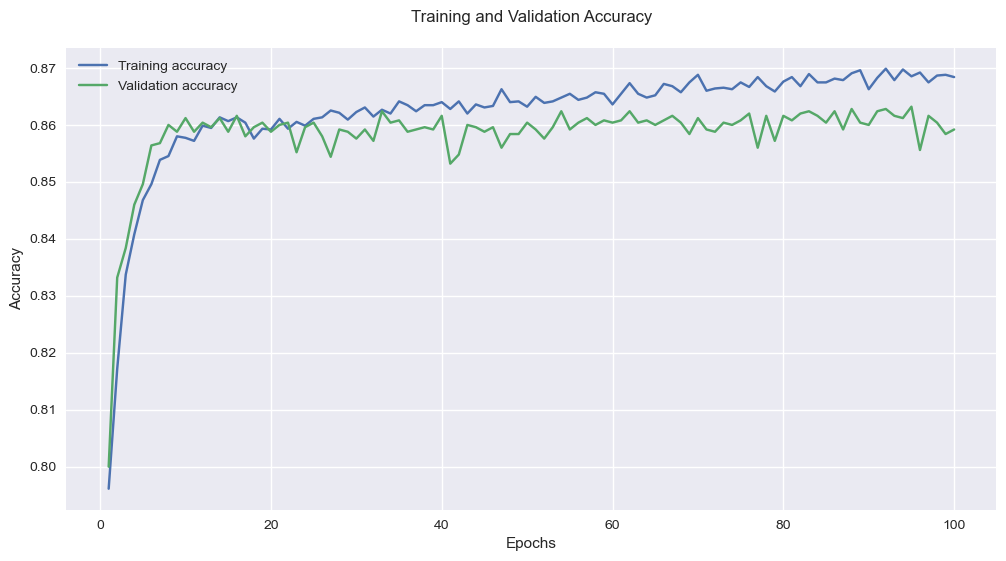

In [216]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [217]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8592
Accuracy of model is 0.8592000007629395


In [218]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

79/79 [==============================] - 0s 2ms/step


In [219]:
y_test = y_test.argmax(axis=-1)
df_compare_preds = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_compare_preds[:20]

y_test  y_pred
0        0       0
1        0       0
2        1       0
3        1       1
4        1       1
5        0       0
6        0       0
7        0       0
8        0       0
9        1       1
10       0       0
11       0       0
12       0       0
13       0       0
14       0       0
15       0       0
16       0       0
17       0       0
18       0       0
19       1       0

In [220]:

from sklearn.metrics import confusion_matrix,classification_report
    
classes = ['class 0: No Churn', 'class 1: Churn']
print('SLNN:')
print(classification_report(y_test, y_pred, target_names=classes))

SLNN:
                   precision    recall  f1-score   support

class 0: No Churn       0.88      0.96      0.92      1980
   class 1: Churn       0.75      0.49      0.59       520

         accuracy                           0.86      2500
        macro avg       0.81      0.72      0.75      2500
     weighted avg       0.85      0.86      0.85      2500



<AxesSubplot:>

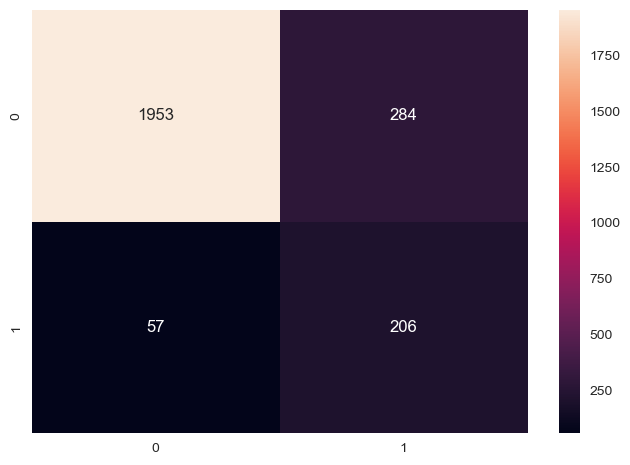

In [159]:
cm_slnn = confusion_matrix(y_pred, y_test)
sns.heatmap(cm_slnn, annot=True, fmt="d")

# MLP model

In [198]:
#parameters
size = (10,) # inpute shape
drop_rate = 0.1
mlp_model = Sequential()
mlp_model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = size))
mlp_model.add(Dropout(rate = drop_rate))
mlp_model.add(BatchNormalization())
mlp_model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))
mlp_model.add(Dropout(rate = drop_rate))
mlp_model.add(BatchNormalization())
mlp_model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))
mlp_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                110       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_16 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_51 (Dense)            (None, 7)                 77        
                                                                 
 dropout_17 (Dropout)        (None, 7)                 0         
                                                                 
 batch_normalization_17 (Bat  (None, 7)                28        
 chNormalization)                                    

In [188]:
mlp_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [189]:
mlp_model_history = mlp_model.fit(X_train, y_train, validation_split = 0.25, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.6081 - accuracy: 0.6836 - val_loss: 0.5464 - val_accuracy: 0.7824
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4416 - accuracy: 0.8187 - val_loss: 0.4121 - val_accuracy: 0.8144
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3938 - accuracy: 0.8351 - val_loss: 0.3661 - val_accuracy: 0.8436
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3853 - accuracy: 0.8431 - val_loss: 0.3593 - val_accuracy: 0.8516
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3849 - accuracy: 0.8447 - val_loss: 0.3587 - val_accuracy: 0.8504
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3819 - accuracy: 0.8445 - val_loss: 0.3564 - val_accuracy: 0.8532
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3797 - accuracy: 0.8425 - val_loss: 0.3564 - val_accuracy: 0.8492

Epoch 58/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3628 - accuracy: 0.8507 - val_loss: 0.3423 - val_accuracy: 0.8620
Epoch 59/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3594 - accuracy: 0.8495 - val_loss: 0.3457 - val_accuracy: 0.8604
Epoch 60/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3596 - accuracy: 0.8505 - val_loss: 0.3407 - val_accuracy: 0.8600
Epoch 61/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3641 - accuracy: 0.8527 - val_loss: 0.3455 - val_accuracy: 0.8580
Epoch 62/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3626 - accuracy: 0.8499 - val_loss: 0.3499 - val_accuracy: 0.8572
Epoch 63/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3623 - accuracy: 0.8536 - val_loss: 0.3461 - val_accuracy: 0.8544
Epoch 64/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3653 - accuracy: 0.8512 - val_loss: 0.3429 - val_accuracy:

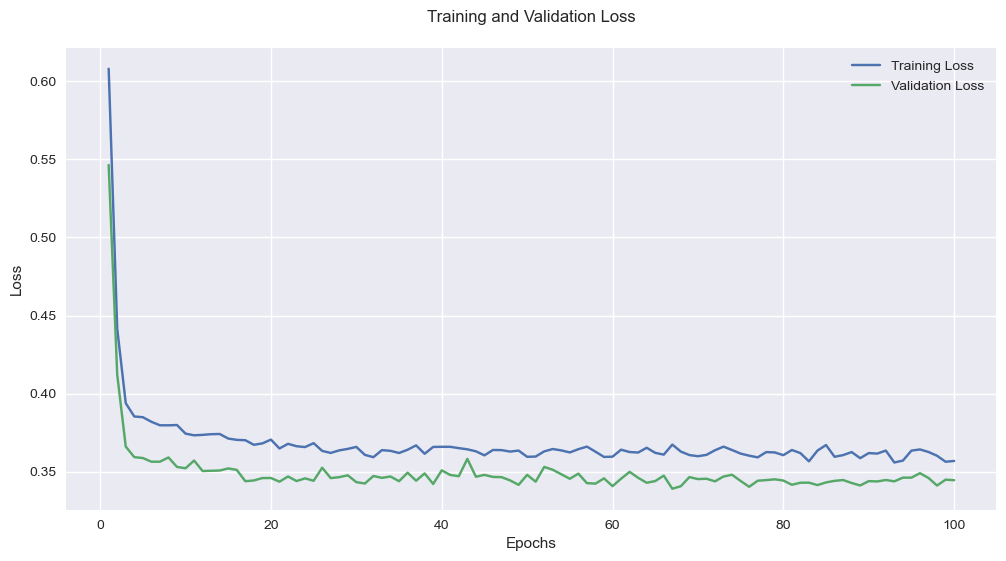

In [190]:
plt.figure(figsize = (12, 6))

train_loss = mlp_model_history.history['loss']
val_loss = mlp_model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

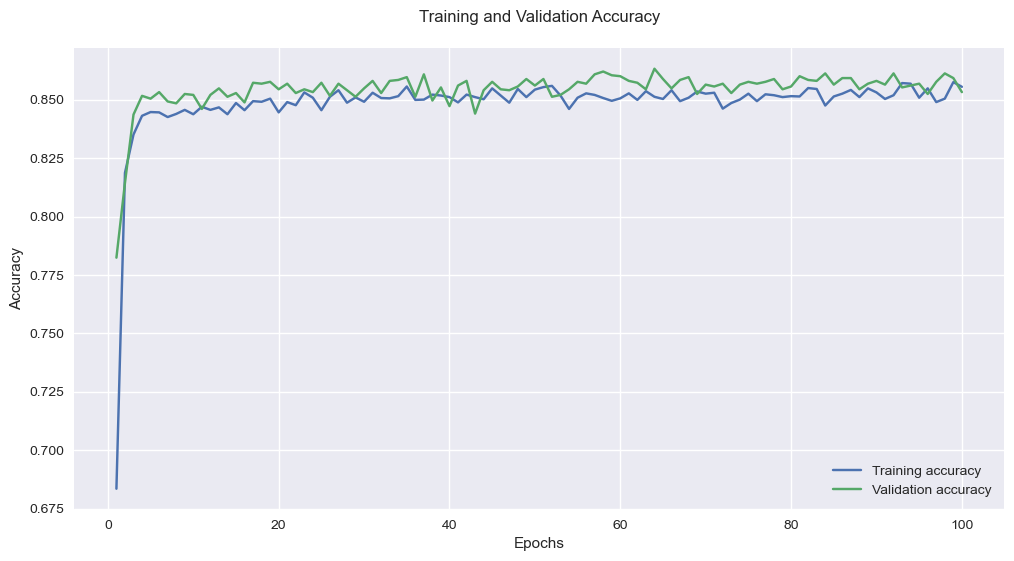

In [191]:
plt.figure(figsize = (12, 6))

train_loss = mlp_model_history.history['accuracy']
val_loss = mlp_model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [192]:
acc = mlp_model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8532
Accuracy of model is 0.8532000184059143


In [194]:
y_pred = mlp_model.predict(X_test)

79/79 [==============================] - 0s 2ms/step


In [195]:
y_pred = y_pred.argmax(axis=-1)
y_test = y_test.argmax(axis=-1)
df_compare_preds = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_compare_preds[:20]

y_test  y_pred
0        0       0
1        1       1
2        0       0
3        0       0
4        0       0
5        1       0
6        0       0
7        0       0
8        0       0
9        0       0
10       0       0
11       0       0
12       0       0
13       1       0
14       0       0
15       0       0
16       0       0
17       0       0
18       0       0
19       0       0

In [203]:
classes = ['class 0: No Churn', 'class 1: Churn']
print('MLP:')
print(classification_report(y_test, y_pred, target_names=classes))

MLP:
                   precision    recall  f1-score   support

class 0: No Churn       0.86      0.97      0.91      1956
   class 1: Churn       0.82      0.42      0.55       544

         accuracy                           0.85      2500
        macro avg       0.84      0.70      0.73      2500
     weighted avg       0.85      0.85      0.83      2500



             j j


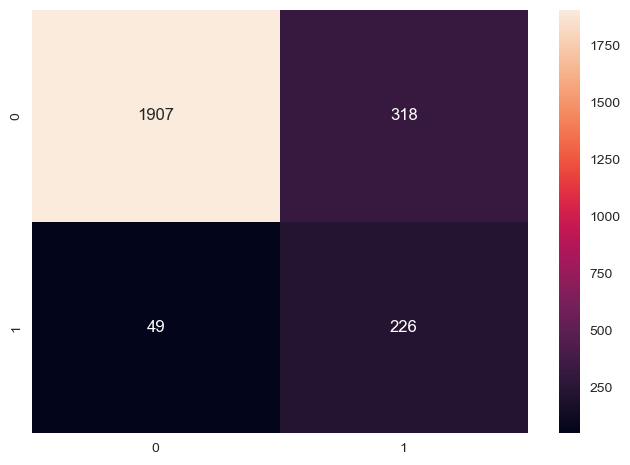

In [201]:
cm_mlp = confusion_matrix(y_pred, y_test)

sns.heatmap(cm_mlp, annot=True, fmt="d")

In [ ]:
#from tensorflow.keras.utils import plot_model

#plot_model(model, show_shapes = True)